## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import itertools

from gensim.utils import lemmatize

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [ ]:
!pip install pattern

     |████████████████████████████████| 22.3MB 136kB/s 
     |████████████████████████████████| 92kB 9.8MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 5.6MB 38.6MB/s 
     |████████████████████████████████| 5.5MB 38.4MB/s 
     |████████████████████████████████| 419kB 36.1MB/s 
     |████████████████████████████████| 3.2MB 37.2MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
  Created wheel for pattern: filename=Pattern-3.6-cp37-none-any.whl size=22332724 sha256=7b523d14147bbe80ac5ae6730075ee5742f2b5719d5f3fb5ba39b49f9149551d
  Stored in directory: /root/.cache/pip/wheels/dc/9a/0e/5fb1a603ed4e3aa8722a88e9cf4a82da7d1b63e3d2cc34bee5
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100097 sha256=41e5f9748aafcfb1cc77b38f8ae2a531150756f23fa3abaa533e25b30b2a7fb5
  Stored in directory: /root/.cache/pip/wheels/75/ca/e8/ad4e7ce3df18bcd91c7d84dd28c7c08db491a2a2360efed363
  Created wheel 

## **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Corpus = pd.read_csv("drive/MyDrive/Dataset_Sentiment/IMDB Dataset.csv",encoding='latin-1')

In [ ]:
Corpus.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


The IMDB reviews dataset dosen't have any null values.

## **1. Data Pre-processing**
This step will help in getting better results through the classification algorithms

### **1.1 Covert the text to lower case**

This is required as python interprets 'text', 'Text' and 'TEXT' differently.

In [ ]:
Corpus['review'] = [text.lower() for text in Corpus['review']]

In [ ]:
Corpus['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

### **1.2 Text Lemmatization**

In [ ]:
for index,text in enumerate(Corpus['review']):
  
    words = [word.decode('utf-8').split('/')[0] for word in lemmatize(text)]
    
    Corpus.loc[index,'review_words'] = str(words)

In [ ]:
Corpus['review_words'].head(5)

0    ['other', 'reviewer', 'have', 'mention', 'watc...
1    ['wonderful', 'little', 'production', 'br', 'f...
2    ['think', 'be', 'wonderful', 'way', 'spend', '...
3    ['basically', 'family', 'little', 'boy', 'jake...
4    ['petter', 'mattei', 'love', 'time', 'money', ...
Name: review_words, dtype: object

### **1.3 Storing the pre-processed data**
The pre-processed reviews are stored in csv file so that they can be deftly accessed for further analysis without wasting precious time as data pre-processing for the large IMDB dataset takes up a few minutes. Thus, the pre-processing block need not be run for every session of building the project.

In [ ]:
Corpus.to_csv("lemsen_imdb.csv")

In [ ]:
Corpus = pd.read_csv("drive/MyDrive/Dataset_Sentiment/lemsen_imdb.csv",encoding='latin-1')

In [ ]:
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        50000 non-null  object
 1   sentiment     50000 non-null  object
 2   review_words  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


## **2. Split the model into Train and Test Data set**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['review_words'],Corpus['sentiment'],test_size=0.2, random_state=123)

## **3. Label encode the target variable**  
This is done to transform Categorical data of string type in the data set into numerical values

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

## **4. Vectorize the words using TF-IDF Vectorizer** 
This is done to find how important a word in document is in comaprison to the corpus

In [ ]:
Tfidf_vect = TfidfVectorizer(decode_error='ignore')
Tfidf_vect.fit(Train_X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
Train_X_Tfidf

<40000x75271 sparse matrix of type '<class 'numpy.float64'>'
	with 3908520 stored elements in Compressed Sparse Row format>

## **5. Review Classification Algorithms**
In this step we will run different algorithms to classify the given data and evaluate on various metrics like AUC score, accuracy, precision, recall and F1 Score.

### **5.1 Naive Bayes**

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
         }

In [ ]:
naive_GS = GridSearchCV(naive_bayes.MultinomialNB(), param_grid=params, n_jobs=-1, cv=10, verbose=3)
naive_GS.fit(Train_X_Tfidf,Train_Y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
naive_GS.best_params_

{'alpha': 0.5}

In [ ]:
# fit the training dataset on the classifier
Naive = naive_bayes.MultinomialNB(alpha=0.5)
Naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [ ]:
# predict the labels on test dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

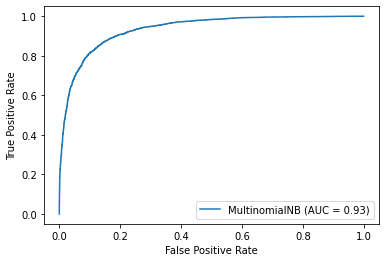

In [ ]:
plot_roc_curve(Naive, Test_X_Tfidf, Test_Y) 

In [ ]:
cm = confusion_matrix(y_true= Test_Y, y_pred=predictions_NB)
plot_labels = [0,1]

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], fontsize= 'xx-large',
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

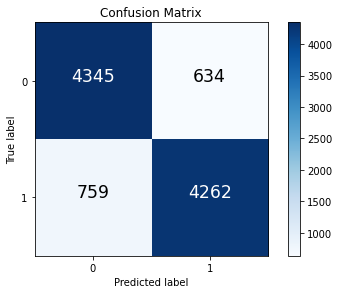

In [ ]:
plot_confusion_matrix(cm=cm, classes=plot_labels, title='Confusion Matrix')

In [ ]:
print("Accuracy  ->  {:.3f}".format(accuracy_score(predictions_NB, Test_Y)),
      "\nPrecision ->  {:.3f}".format(precision_score(predictions_NB, Test_Y)),
      "\nRecall    ->  {:.3f}".format(recall_score(predictions_NB, Test_Y)),
      "\nF1-Score  ->  {:.3f}".format(f1_score(predictions_NB, Test_Y)))

Accuracy  ->  0.861 
Precision ->  0.849 
Recall    ->  0.871 
F1-Score  ->  0.860


### **5.2 SVM**
optimal parameters considered are C=100, gamma=0.01 and kernel='rbf'

In [ ]:
SVM = svm.SVC(C=100, gamma=.01, kernel='rbf')

In [ ]:
# fitting training data on the classifier
SVM.fit(Train_X_Tfidf,Train_Y)

In [ ]:
# predicting labels on test dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

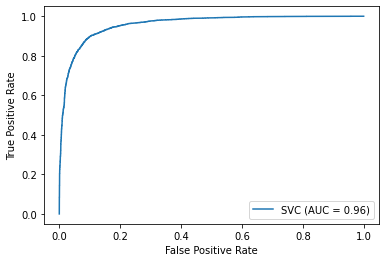

In [ ]:
plot_roc_curve(SVM, Test_X_Tfidf, Test_Y)

In [ ]:
cm = confusion_matrix(y_true= Test_Y, y_pred=predictions_SVM)
plot_labels = [0,1]

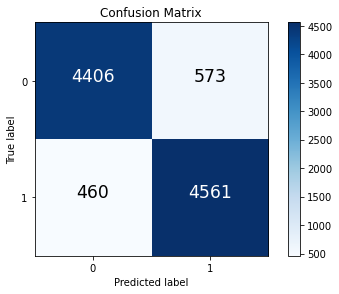

In [ ]:
plot_confusion_matrix(cm= cm, classes=plot_labels, title='Confusion Matrix')

In [ ]:
print("Accuracy  ->  {:.3f}".format(accuracy_score(predictions_SVM, Test_Y)),
      "\nPrecision ->  {:.3f}".format(precision_score(predictions_SVM, Test_Y)),
      "\nRecall    ->  {:.3f}".format(recall_score(predictions_SVM, Test_Y)),
      "\nF1-Score  ->  {:.3f}".format(f1_score(predictions_SVM, Test_Y)))

Accuracy  ->  0.897 
Precision ->  0.908 
Recall    ->  0.888 
F1-Score  ->  0.898
